<a href="https://colab.research.google.com/github/Nikunjbansal99/MNISTClassification/blob/main/MNISTClassificationUsingXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


1.   **Importing Some Basic Libraries**


2.   **Importing Data from keras**


3.   **Data Pre-Processing**
    1.   **Data Description**
    2.   **Normalization**
    3.   **Reshape**
    4.   **Checking null values and missing values**
4.   **Analysis of Target Variable**
    1.   **Count Plot**
    2.   **Count of different Classes in label**
5.   **Top Correlated Pixel Features**
6.   **Apply Feature Selection**
7.   **XGBoost Model**
    1.   **Creating the XGBoost Model**
    2.   **Data augmentation**


8.   **Evaluation**
    1. **On Training Data:**
        1.   **Confusion Matrix**
        2.   **Classification Report**
    2. **On Testing Data:**
        1.   **Confusion Matrix**
        2.   **Classification Report**


9.   **Performing Prediction on Testing Data**
    1.   **Predict results**
    2.   **Save results to .csv format**

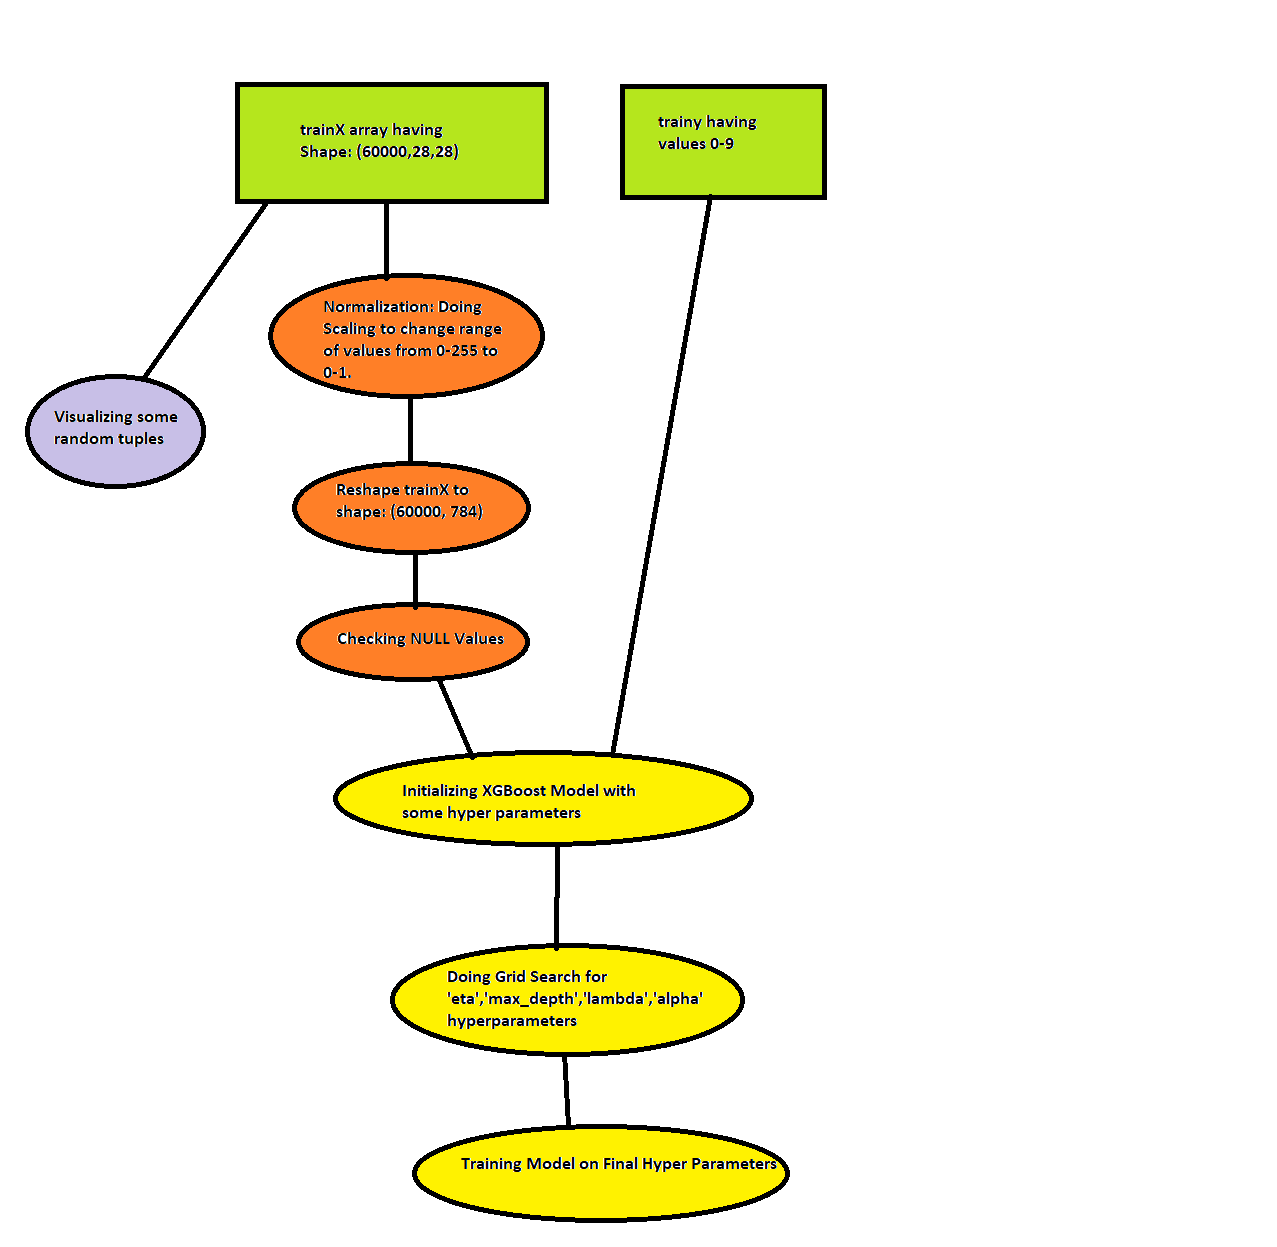

# **Importing Some Basic Libraries**

In [ ]:
!pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 101kB/s 
     |████████████████████████████████| 1.7MB 47.6MB/s 
     |████████████████████████████████| 890kB 42.9MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=078f1cf39c5497d0c9192d971de32d1a0cc0303321d3210b060d289f102d43a6
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install xgboost

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.4.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import check_random_state
import sys, os
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Importing Data**

In [ ]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data(path="mnist.npz")    

# **Data Pre-Processing**

## **Data Description**

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainy.shape

(60000,)

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
testy.shape

(10000,)

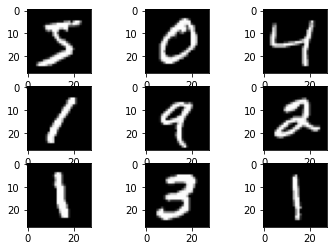

In [ ]:
# Printing Target Class Values for some Random Tuple's
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

## **Doing Normalization**

In [ ]:
# As we got initial values in the range 0 to 255. So, we will normalize it into 0 to 1 range.
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [ ]:
trainX[0]                      # As We are seeing our trainX values got normalized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
trainX[:]              # We have 28*28 independent feature(Pixel) values for each target feature(i.e. total 60000)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
NumRows, NumCols = 60000, 784
InitialValue = 0.                                                       
TrainX = np.array([[InitialValue] * NumCols for _ in range(NumRows)])           # Initializing numpy array of shape (60000,784) with all values as 0.

In [ ]:
TrainX.shape

(60000, 784)

In [ ]:
for i in range(0,60000,1):
    TrainX[i] = trainX[i].ravel()                                               # We are converting trainX of shape (60000,28,28) to TrainX of shape (60000, 784)

In [ ]:
trainy.shape

(60000,)

In [ ]:
NumRows, NumCols = 10000, 784
InitialValue = 0.                                                       
TestX = np.array([[InitialValue] * NumCols for _ in range(NumRows)])            # Initializing numpy array of shape (10000,784) with all values as 0.

In [ ]:
TestX.shape

(10000, 784)

In [ ]:
for i in range(0,10000,1):
    TestX[i] = testX[i].ravel()                                                 # We are converting testX of shape(10000,28,28) to TestX of shape(10000, 784)

In [ ]:
# Converting np.ndarray to pandas DataFrame Respectively.
trainX_df = pd.DataFrame(data=TrainX[:,0:784])   
testX_df = pd.DataFrame(data=TestX[:,0:784])         

In [ ]:
# Converting np.ndarray to pandas DataFrame Respectively.
trainy_df = pd.DataFrame(data = trainy,  columns = ['label']) 
testy_df = pd.DataFrame(data = testy,  columns = ['label']) 

In [ ]:
trainX_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trainy_df.head()

,label
0,5
1,0
2,4
3,1
4,9


In [ ]:
training_dataframe = pd.concat([trainX_df, trainy_df], axis=1)
testing_dataframe = pd.concat([testX_df, testy_df], axis=1)

In [ ]:
print("Size of Training dataset       : {}".format(training_dataframe.shape))
print("Size of Testing dataset       : {}".format(testing_dataframe.shape))

Size of Training dataset       : (60000, 785)
Size of Testing dataset       : (10000, 785)


In [ ]:
training_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to label
dtypes: float64(784), uint8(1)
memory usage: 358.9 MB


In [ ]:
training_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.000031,0.000014,5.882353e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000036,0.000095,0.000171,0.000251,0.000471,0.000630,...,0.010164,0.006671,0.003955,0.002119,0.000935,0.000295,0.000063,0.000002,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.000061,0.000163,0.000350,0.000503,0.000772,0.001318,0.001686,0.002063,0.002316,0.002698,0.002322,0.001893,0.001347,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001864,0.005338,0.003458,1.440876e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000256,0.000763,0.004137,0.008216,0.011616,0.013035,0.019095,0.021682,...,0.087260,0.071008,0.054498,0.040462,0.025696,0.013727,0.004870,0.000451,0.000945,0.0,0.0,0.0,0.0,0.0,0.0,0.001716,0.006750,0.010201,0.015814,0.018730,0.024227,0.030120,0.035661,0.038817,0.040910,0.044718,0.041244,0.036854,0.031599,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## **NULL VALUES**

In [ ]:
training_dataframe.isna().sum()                        # Printing a count of missing value w.r.t each feature in training dataframe

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64

**Hence, it has no missing values.**

# **Analysis of Target Variable**

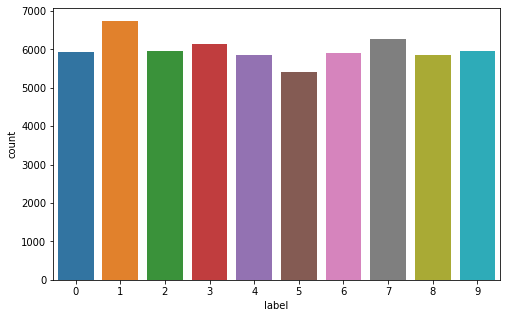

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=training_dataframe, order=[0,1,2,3,4,5,6,7,8,9] )

In [ ]:
training_dataframe['label'].value_counts()           # Prints the count of different classes in 'label'

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

**Hence, We found that our data is almost Balanced. Therefore, there is No need to do Upsampling and Downsampling.**

# **Top Correlated Pixel Features**

Text(0, 0.5, 'Pixel Features')

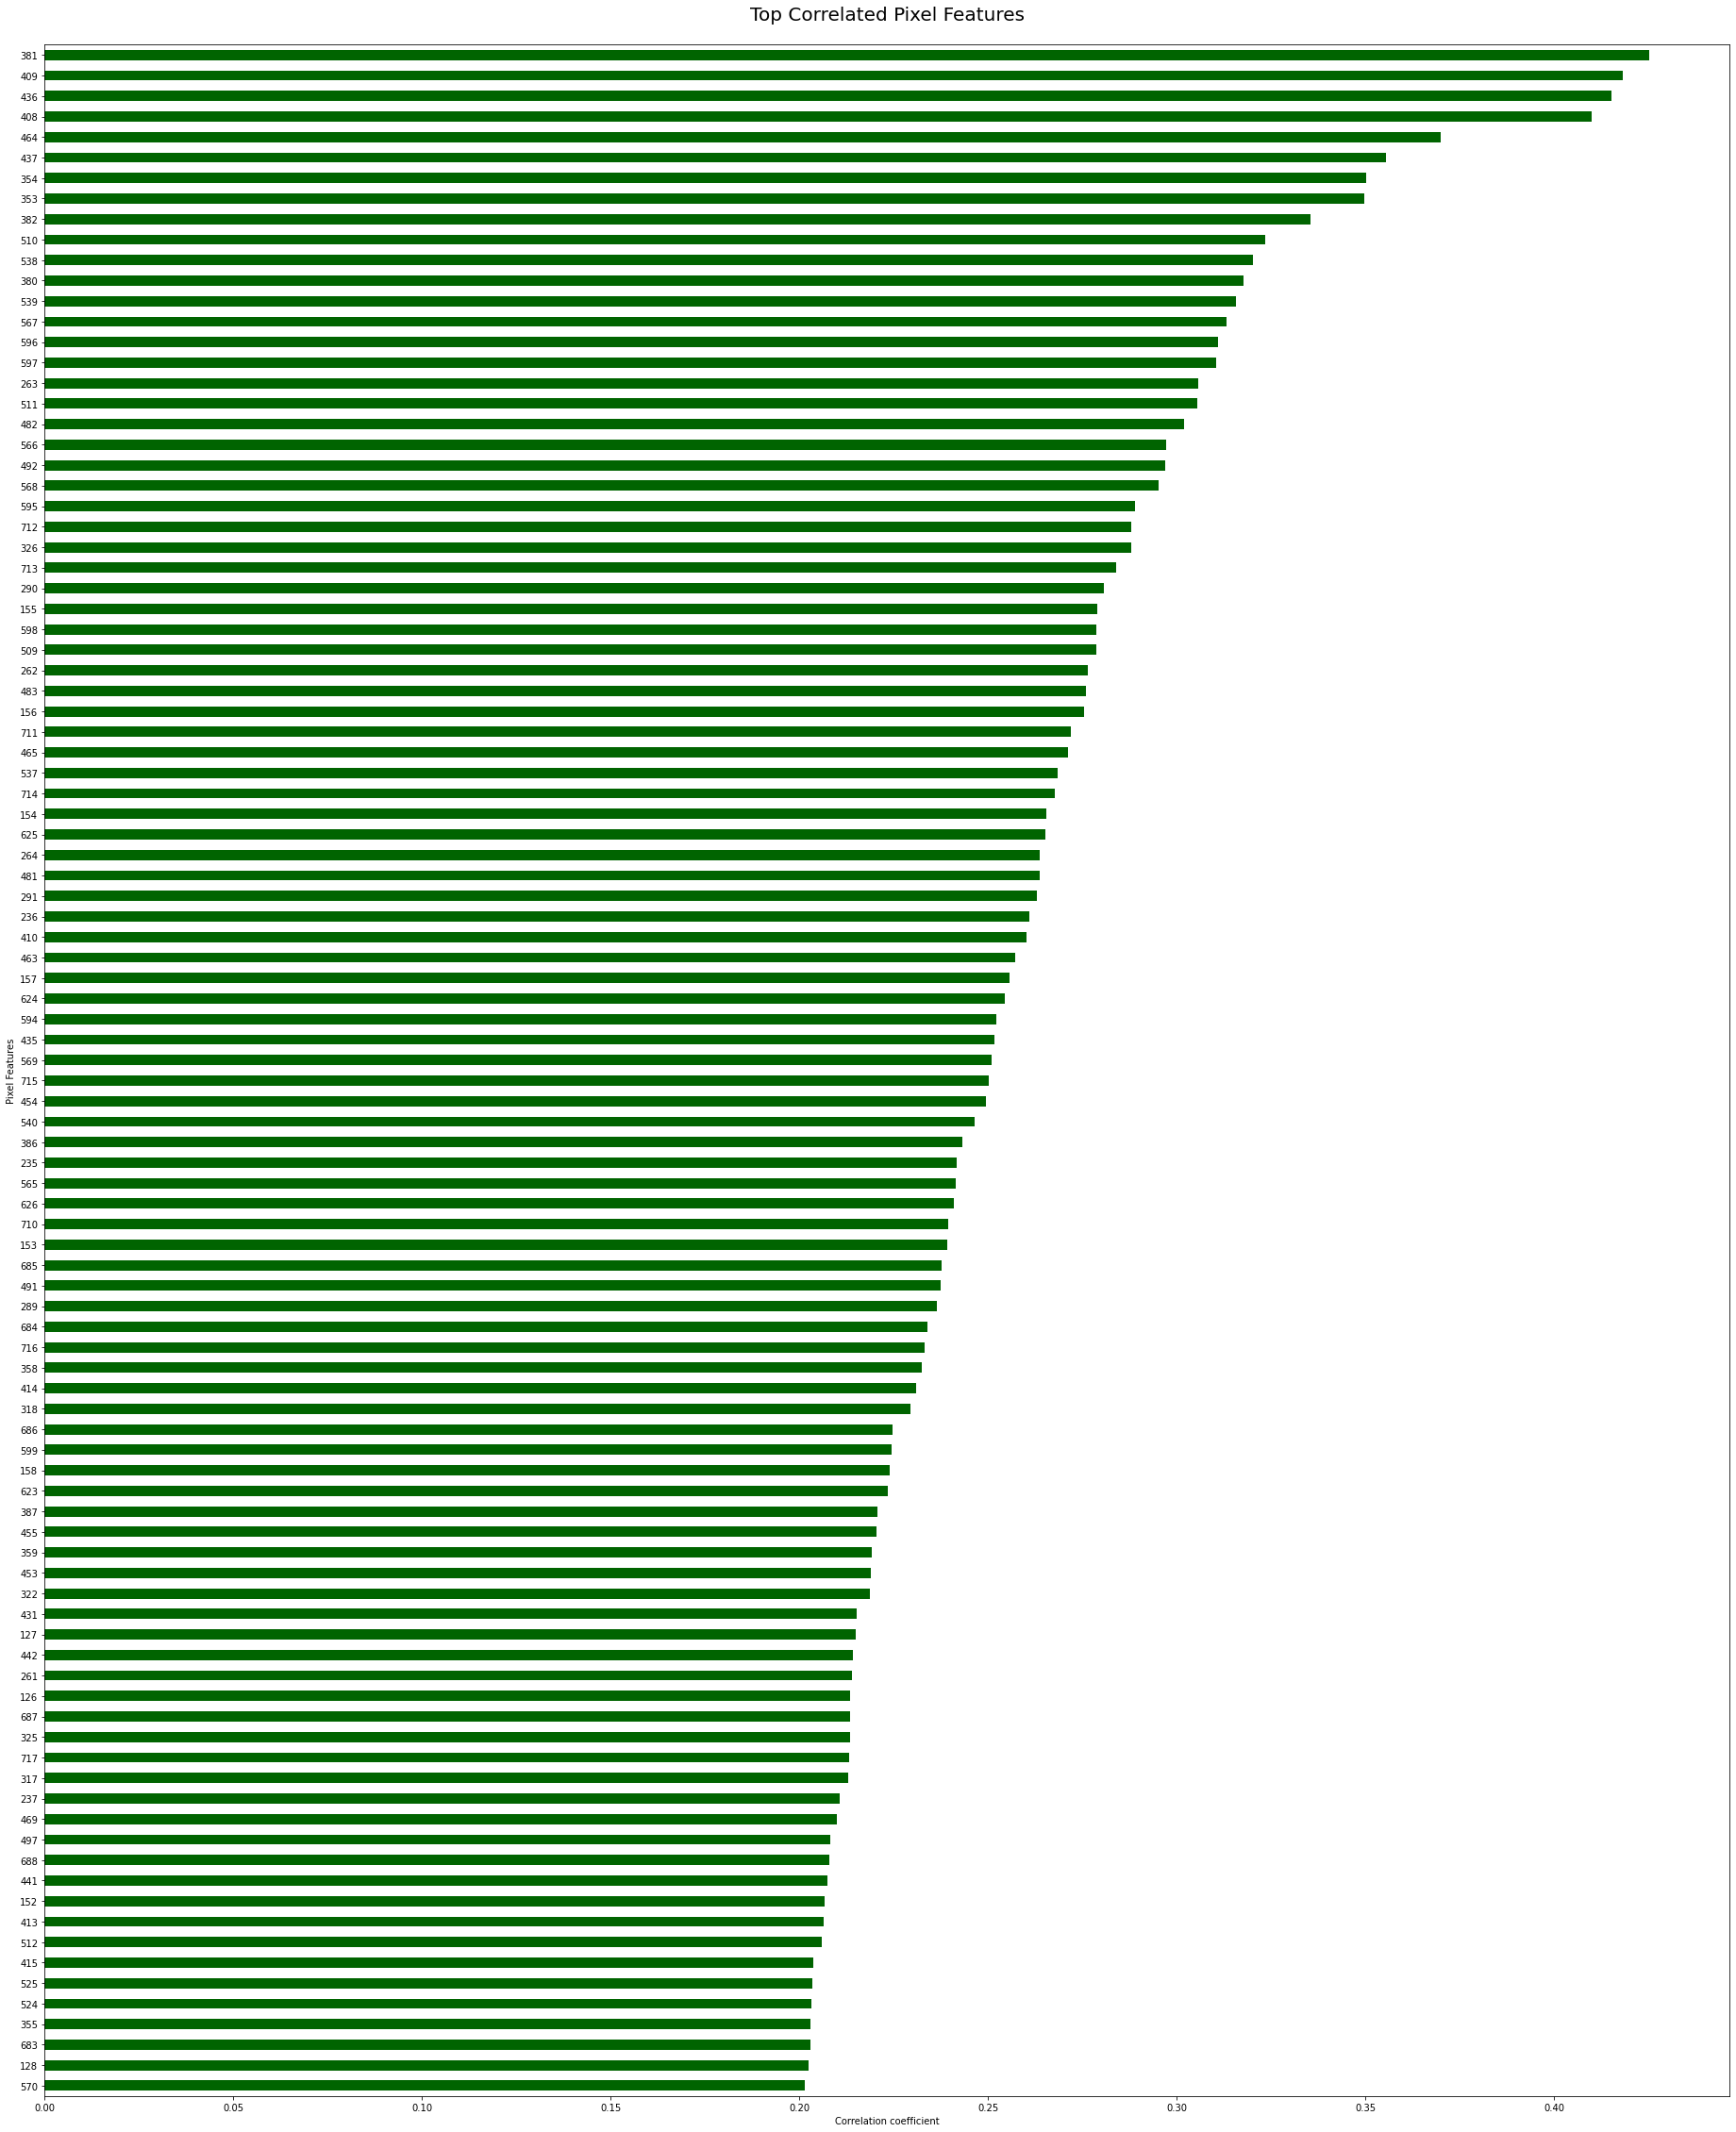

In [ ]:
corr_data = training_dataframe.corr()
selected_pixel_features = corr_data.label.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:101][::-1]
plt.figure(figsize=(32,40))
selected_pixel_features.plot(kind='barh',color='darkgreen')
# Top Correlated Pixel Features w.r.t target variable i.e. "label"
plt.title("Top Correlated Pixel Features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Pixel Features")

### **Here, Feature Selection Using the Correlation coefficient is the best way to perform the dimensionality reduction because in all the images some pixel features have 0 value like as we know digit comes in the middle of the 28*28 segment image in MNIST Dataset(as they already applied the anti-aliasing technique). So the side pixel is of no use while doing Prediction. So droping those pixel features which have value zero in all images will help in dimensionality reduction. These pixel features will be dropped efficiently and easily with the help of correlation coefficient.**

In [ ]:
Selected_Pixel_Features = [381,409,436,408,464,437,354,353,382,510,538,380,539,567,596,597,263,511,482,566,492,568,595,712,326,713,290,155,598,509,262,483,156,711,465,537,714,154,625,264,481,291,236,410,463,157,624,594,435,569,715,454,540,386,235,565,626,710,153,685,491,289,684,716,358,414,318,686,599,158,623,387,455,359,453,322,431,127,442,261,126,687,325,717,317,237,469,497,688,441,152,413,512,415,525,524,355,683,128,570]

In [ ]:
trainX_df = training_dataframe[Selected_Pixel_Features]
trainy_df = training_dataframe.label

In [ ]:
trainX_df.head()

,381,409,436,408,464,437,354,353,382,510,538,380,539,567,596,597,263,511,482,566,492,568,595,712,326,713,290,155,598,509,262,483,156,711,465,537,714,154,625,264,...,491,289,684,716,358,414,318,686,599,158,623,387,455,359,453,322,431,127,442,261,126,687,325,717,317,237,469,497,688,441,152,413,512,415,525,524,355,683,128,570
0,0.003922,0.466667,0.992157,0.992157,0.364706,0.992157,0.000000,0.000000,0.000000,0.000000,0.000000,0.423529,0.000000,0.000000,0.090196,0.258824,0.992157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.003922,0.070588,0.835294,0.0,0.419608,0.000000,0.494118,0.0,0.988235,0.0,0.000000,0.070588,0.992157,0.992157,...,0.000000,0.054902,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.992157,0.686275,0.670588,0.0,0.000000,0.0,0.000000,0.007843,0.000000,0.0,0.000000,0.611765,0.0,0.000000,0.000000,0.000000,0.000000,0.992157,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000,0.0,0.0,0.007843,0.000000,0.062745,0.000000,0.094118
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.337255,0.000000,0.992157,0.988235,0.988235,0.988235,0.933333,0.988235,0.333333,0.333333,0.000000,0.976471,0.988235,0.0,0.000000,0.0,0.933333,0.933333,0.898039,0.0,0.200000,0.988235,0.988235,0.0,0.000000,0.0,0.000000,0.188235,0.988235,0.992157,...,0.000000,0.188235,0.0,0.000000,0.764706,0.768627,0.992157,0.000000,0.843137,0.988235,0.780392,0.0,0.988235,0.0,0.000000,0.000000,0.000000,0.2,0.580392,0.000000,0.0,0.000000,0.000000,0.000000,0.647059,0.988235,0.729412,0.278431,0.000000,0.988235,0.000000,0.992157,0.568627,0.0,0.0,0.000000,0.000000,0.000000,0.623529,0.188235
2,0.698039,0.701961,0.109804,0.917647,0.000000,0.019608,0.639216,0.000000,0.972549,0.000000,0.000000,0.337255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090196,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.400000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.694118,0.0,0.694118,0.000000,0.980392,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.996078,0.000000,0.000000,0.000000
3,0.058824,0.000000,0.000000,0.090196,0.000000,0.000000,0.000000,0.494118,0.000000,0.000000,0.000000,0.721569,0.000000,0.000000,0.188235,0.894118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.258824,0.0,0.000000,0.000000,0.992157,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.984314,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.968627,0.486275,0.000000,0.0,0.000000,0.0,0.000000,0.078431,0.125490,0.0,0.000000,0.000000,0.0,0.000000,0.921569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.862745,0.000000,1.000000
4,0.662745,0.301961,0.905882,0.984314,0.560784,0.000000,0.505882,0.992157,0.043137,0.000000,0.000000,0.988235,0.000000,0.000000,0.000000,0.000000,0.949020,0.000000,0.000000,0.000000,0.427451,0.000000,0.000000,0.0,0.988235,0.0,0.988235,0.000000,0.000000,0.0,0.223529,0.000000,0.000000,0.0,0.000000,0.0,0.054902,0.000000,0.000000,0.988235,...,0.992157,0.376471,0.0,0.988235,0.000000,0.000000,0.988235,0.376471,0.000000,0.000000,0.000000,0.0,0.215686,0.0,0.000000,0.000000,0.988235,0.0,0.000000,0.015686,0.0,0.988235,0.988235,0.666667,0.992157,0.988235,0.000000,0.000000,0.741176,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
trainy_df.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: uint8

In [ ]:
train_df = pd.concat([trainX_df, trainy_df], axis=1)

In [ ]:
testX_df = testing_dataframe[Selected_Pixel_Features]
testy_df = testing_dataframe['label']

In [ ]:
testX_df.head()

,381,409,436,408,464,437,354,353,382,510,538,380,539,567,596,597,263,511,482,566,492,568,595,712,326,713,290,155,598,509,262,483,156,711,465,537,714,154,625,264,...,491,289,684,716,358,414,318,686,599,158,623,387,455,359,453,322,431,127,442,261,126,687,325,717,317,237,469,497,688,441,152,413,512,415,525,524,355,683,128,570
0,0.505882,0.976471,0.521569,0.231373,0.803922,0.996078,0.913725,0.086275,0.996078,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.890196,0.00000,0.0,0.0,0.996078,0.000000,0.000000,0.996078,0.325490,0.858824,0.000000,0.000000,0.000000,0.0,0.639216,0.000000,0.000000,0.996078,0.972549,0.0,0.156863,0.000000,0.000000,0.996078,...,0.494118,0.000000,0.996078,0.0,0.000000,0.000000,0.000000,0.203922,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.447059,0.000000,0.0,0.000000,0.0,0.000000,0.776471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.94902,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.682353,0.992157,0.000000,0.00000,0.0,0.0,0.000000,0.972549,0.000000,0.000000,0.000000,0.000000,0.000000,0.992157,0.992157,0.0,0.000000,0.000000,0.992157,0.000000,0.000000,0.0,0.000000,0.690196,0.462745,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.992157,0.000000,0.0,0.0,0.000000,0.0,0.0,0.992157,0.992157,0.992157,0.000000,0.000000,0.992157,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.835294,0.000000,0.972549,0.0,0.0,0.000000,0.000000,0.00000,0.854902,0.992157
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.341176,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.552941,0.321569,0.0,0.0,0.000000,0.0,0.0,0.372549,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.149020,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.082353,0.000000,0.427451,0.000000,0.121569,0.0,0.0,0.000000,0.854902,0.443137,0.901961,0.984314,0.992157,0.85098,0.0,0.0,0.564706,0.984314,0.121569,0.000000,0.901961,0.000000,0.992157,0.992157,0.992157,0.0,1.000000,0.850980,0.419608,0.000000,0.247059,0.0,0.000000,0.984314,0.556863,0.992157,...,0.000000,0.866667,0.000000,0.0,0.137255,0.643137,0.992157,0.000000,0.984314,0.000000,0.0,0.0,0.850980,0.0,0.0,0.039216,0.000000,0.792157,0.137255,0.713726,0.992157,0.0,0.121569,0.0,0.984314,0.984314,0.901961,0.239216,0.000000,0.984314,0.145098,0.992157,0.984314,0.0,0.0,0.705882,0.984314,0.00000,0.121569,0.992157
4,0.525490,0.662745,0.086275,0.000000,0.764706,0.992157,0.909804,0.125490,0.988235,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047059,0.00000,0.0,0.0,0.984314,0.000000,0.000000,0.000000,0.552941,0.000000,0.207843,0.000000,0.000000,0.0,0.850980,0.160784,0.000000,0.000000,0.988235,0.0,0.000000,0.000000,0.000000,0.000000,...,0.905882,0.968627,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.662745,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.925490,0.000000,0.0,0.000000,0.0,0.827451,0.000000,0.000000,0.000000,0.701961,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.980392,0.00000,0.000000,0.000000


In [ ]:
testy_df.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: uint8

In [ ]:
train_df.columns[0]

381

# **XGBoost Model:**

In [ ]:
# Creating a XGBoost Classifier
XGBoostModel = XGBClassifier(learning_rate =0.1,colsample_bytree=0.8,nthread=4,n_estimators=1000,scale_pos_weight=1,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,seed=15)

In [ ]:
# Creating the parameter grid
grid = {
    'eta':  [0.3, 0.5],
    'max_depth': [3,6,10],
    'lambda': [1, 1.1],
    'alpha': [0, 0.1]
}

In [ ]:
# Creating the grid search model
grid_search = GridSearchCV(estimator = XGBoostModel, param_grid = grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Applying grid search on the training data
grid_search.fit(trainX_df[:1000], trainy_df[:1000])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=15, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0, 0.1], 'eta': [0.3, 0.5],
                         'lambda': [1, 1.1], 'max_depth': [3, 6, 10]},
             pre_dispatch='2*n_jobs', refit=T

In [ ]:
grid_search.best_params_                         # Best Hyperparameters for the Final XGBoost Model

{'alpha': 0, 'eta': 0.3, 'lambda': 1, 'max_depth': 10}

In [ ]:
XGBoostModel = XGBClassifier(learning_rate =0.1,colsample_bytree=0.8,nthread=4,n_estimators=1000,scale_pos_weight=1,max_depth=10,min_child_weight=1,gamma=0,subsample=0.8,seed=15)                     # Assigning final Model

In [ ]:
# Start Training of the XGBoost Model on training data
XGBoostModel.fit(trainX_df, trainy_df)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### **Perform Prediction on Training Data:**

In [ ]:
XGBoost_train_pred = XGBoostModel.predict(trainX_df)

### **Perform Prediction on Testing Data:**

In [ ]:
XGBoost_test_pred = XGBoostModel.predict(testX_df)

# **Evaluation**

### **On Training Data:**

In [ ]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(trainy_df, XGBoost_train_pred))

print("XGBoost Classification Report")
print(classification_report(trainy_df, XGBoost_train_pred))

XGBoost Confusion Matrix:
[[5674    1   35   16    7   25   90    4   66    5]
 [   2 6570   42   18    7   30   15   18   39    1]
 [  95  135 5081   73   75   36  123   88  230   22]
 [  34   71  214 5061   18  259   75  130  150  119]
 [  14   23   47    8 4957   20   84  139   61  489]
 [  82   93   42  210   36 4569  215   56   70   48]
 [  81   41   53    7  108  161 5420    6   37    4]
 [  18   51   65   44   94   13    9 5611   31  329]
 [  20  142  179  191   44  179  205   79 4686  126]
 [  21   36   41   69  412   36   30  694  125 4485]]
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5923
           1       0.92      0.97      0.94      6742
           2       0.88      0.85      0.86      5958
           3       0.89      0.83      0.86      6131
           4       0.86      0.85      0.85      5842
           5       0.86      0.84      0.85      5421
           6       0.86      0.92 

### **On Testing Data:**

In [ ]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(testy_df, XGBoost_test_pred))

print("XGBoost Classification Report")
print(classification_report(testy_df, XGBoost_test_pred))

XGBoost Confusion Matrix:
[[ 952    2    1    1    1    6    7    1    9    0]
 [   0 1108    5    4    2    2    7    0    7    0]
 [  21   18  864   17   14   11   22   16   47    2]
 [   4    8   31  838    1   50   13   20   30   15]
 [   3    3    4    1  843    4   16   19    7   82]
 [  20   18    5   43    6  744   26   11   14    5]
 [  24    5    9    7   29   24  849    4    6    1]
 [   2   15   19    9   12    1    2  906    6   56]
 [   8    9   24   21    8   30   43   22  787   22]
 [   7    7    5    7   76    6    5   97   27  772]]
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.93      0.98      0.95      1135
           2       0.89      0.84      0.86      1032
           3       0.88      0.83      0.86      1010
           4       0.85      0.86      0.85       982
           5       0.85      0.83      0.84       892
           6       0.86      0.89 



# **Predictions on Test Data:**

In [ ]:
OutputDF = pd.DataFrame({'Actual_label':testy,'Predicted_label':XGBoost_test_pred})

In [ ]:
#Save to csv
OutputDF.to_csv('MNIST_Digit_Pred.csv',index=False)
OutputDF.head()

,Actual_label,Predicted_label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>